 ```
Лабораторная работа 2

Базовые алгоритмы классификации с использованием библиотеки sklearn
Провести обучение и классификацию данных. Выполнить следующие процедуры:
1) Загрузить данные с сайта, считать и вывести на экран названия колонок и размер датасета
2) Обработать пропуски (по возможности заполнить их или удалить)
3) Визуализировать данные: построить график (heatmap) отображающий корреляции
признаков между собой и с целевой переменной (разметкой); построить гистограммы
распределения признаков и ящичковые (boxplot) диаграммы признаков относительно
целевой переменной (если признаков слишком много ограничиться несколькими).
4) Масштабировать данные
5) Провести обучение следующих классификаторов:
    kNN(sklearn.neighbors.KNeighborsClassifier)
    обучить дерево принятия решений, визуализировать его (используя
    sklearn.tree.export_graphviz и pydot)
    SVM(sklearn.svm.SVC)

6) Провести обучение ансамблевых классификаторов (Random Forest, AdaBoost, Gradient Boost)
Подобрать оптимальные параметры для каждой модели:
    Число ближайших соседей для kNN
    Для SVM рассмотреть линейное ядро и rbf, с помощью решетчатого поиска
    ( sklearn . grid _search.GridSearchCV) подобрать оптимальные «C» и «gamma»
    для ансамблевых методов найти оптимальные значения параметров с помощью
    решетчатого поиска

Среди выбранных оптимальных моделей каждого класса выбрать наилучшую (считая основным
критерием метрику f1-score)
Отобразить sklearn.metrics.classification_report и sklearn.metrics.confusion_matrix
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1) Загрузить данные с сайта, считать и вывести на экран названия колонок и размер датасета

In [2]:
df = pd.read_csv("bird.csv")

In [3]:
df.columns, df.shape

(Index(['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
        'tarl', 'tarw', 'type'],
       dtype='object'),
 (420, 12))

## 2) Обработать пропуски (по возможности заполнить их или удалить)

In [4]:
df.isna().sum() # missed values

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [5]:
df = df.fillna(df.mean())
df = df.drop(columns=['id'])

## 3) Визуализировать данные: 

####  построить график (heatmap) отображающий корреляции признаков между собой и с целевой переменной (разметкой)

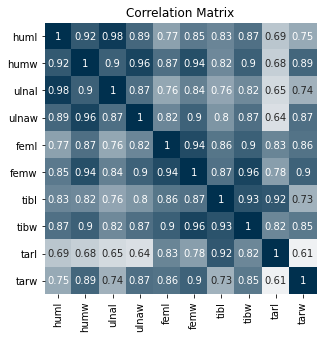

In [7]:

feature_columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw'] # numeric feature columns.

corr = df[feature_columns].corr()

_, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(
    corr, 
    cmap=sns.light_palette("#00304e", as_cmap=True), 
    square=True, 
    cbar=False, 
    ax=ax, 
    annot=True, 
    annot_kws={"fontsize": 10}
)

_ = ax.set_title("Correlation Matrix", fontsize=12)

#### построить гистограммы распределения признаков

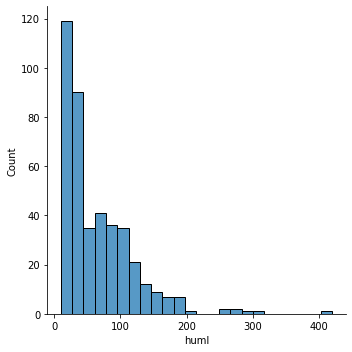

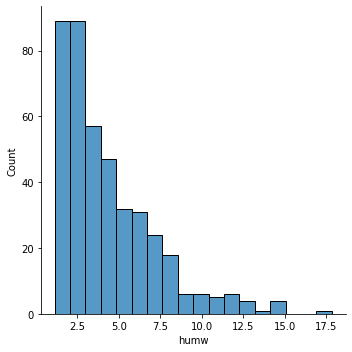

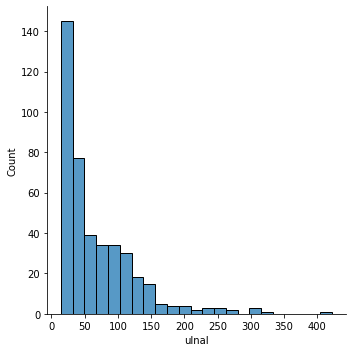

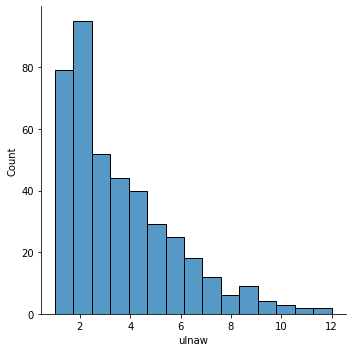

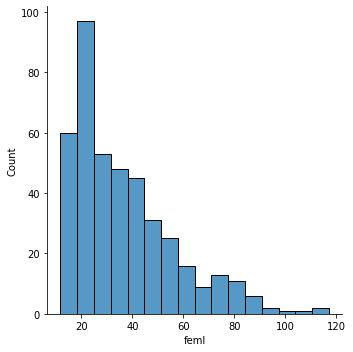

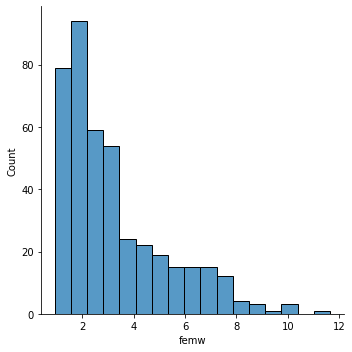

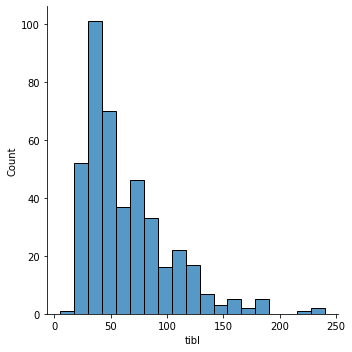

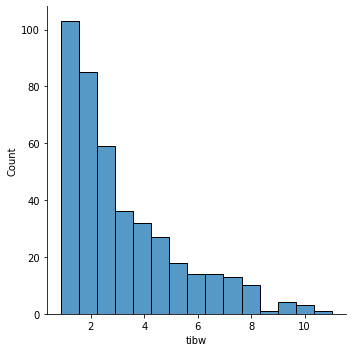

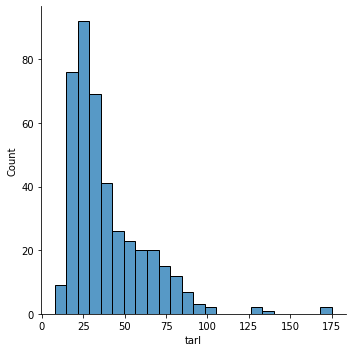

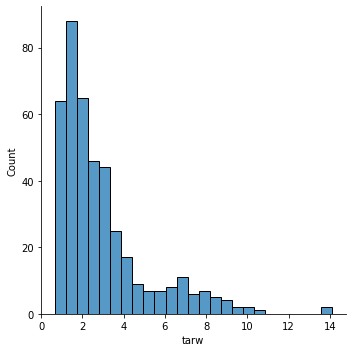

In [8]:
for bird_type in feature_columns: 
    sns.displot(df, x=bird_type)

#### ящичковые (boxplot) диаграммы признаков относительно целевой переменной 

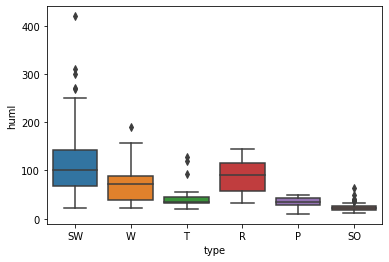

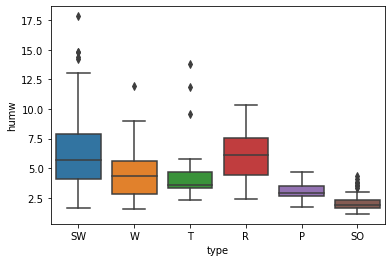

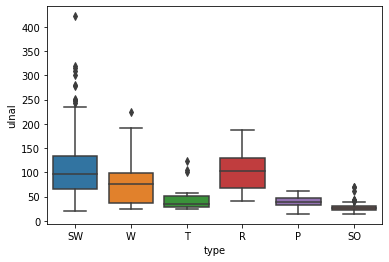

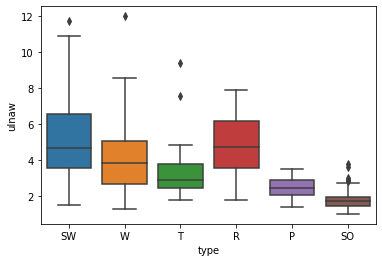

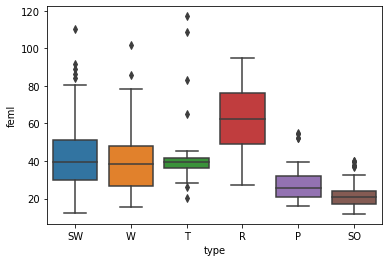

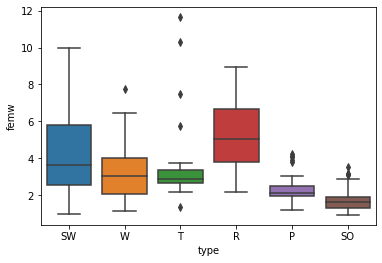

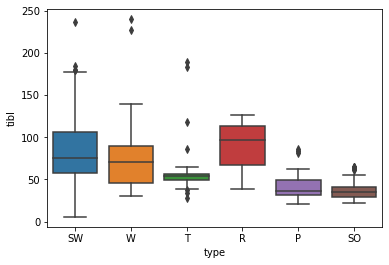

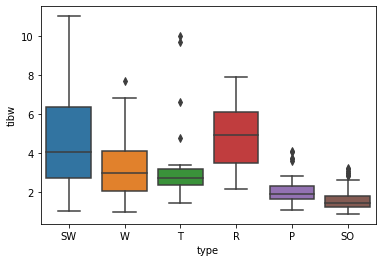

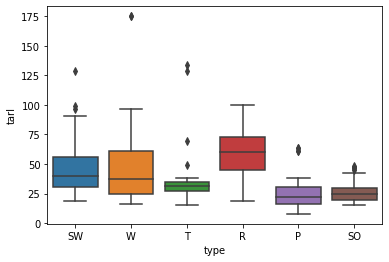

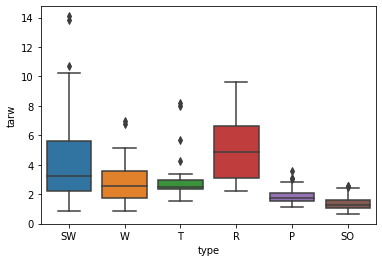

In [9]:
for bird_type in feature_columns:
    fig = plt.figure()
    ax = sns.boxplot(x="type", y=bird_type,data=df)

In [10]:
X = df.drop('type', axis = 1).values
y = df['type'].values.reshape(-1,1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import  export_graphviz
import pydotplus

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
parameters_knn = {  'model__algorithm' : ['brute'],
                    'model__leaf_size' : [30,50,70,90,110],
                    'model__metric' : ['minkowski'],
                    'model__p' : [1],
                    'model__n_neighbors' : [3,5,11,19],
                    'model__weights' : ['uniform', 'distance'],
                    'model__n_jobs' : [-1]
                 }

parameters_rfc =  { "model__n_estimators": [100,200],
                    "model__max_features": ["auto", "sqrt"],
                    "model__max_depth":[10,20],
                    "model__min_samples_split": [2, 5],
                    "model__min_samples_leaf": [1, 2],
                    "model__bootstrap": [True, False],
                    "model__criterion": ["gini"],
                    "model__random_state" : [42] 
                  }

parameters_ab =  { "model__algorithm": [ 'SAMME.R',  'SAMME'],
                    "model__learning_rate":[0.5,1,2,3],
                    "model__n_estimators": [50,100,150,200,300],
                    "model__random_state" : [42] 
                 }

parameters_svc = { 'model__kernel' : ['linear','rbf'],
                   'model__C' : [1,10,100,1000,10000],
                   'model__random_state' : [42],
                   'model__gamma' : ['scale','auto']
                 }

parameters_gb =  { "model__n_estimators": [100,200],
                   "model__loss": ['deviance', 'exponential'],
                   "model__learning_rate": [0.1],
                   "model__max_features": ['auto', 'sqrt'],
                   "model__criterion": ['friedman_mse', 'mse', 'mae'],
                   "model__random_state": [42] 
                 }

parameters_dt =  { "model__max_depth": np.arange(1,10),
                   "model__min_samples_leaf": [1, 5, 10, 20],
                   "model__min_samples_split": np.arange(2, 11),
                   "model__criterion": ["gini", "entropy"],
                   "model__random_state" : [42]
                 }

In [13]:
def apply_ml_model(ml_model,parameters, X_train, y_train):
    steps = [
        ('scalar', StandardScaler()),
        ('model', ml_model)
    ]
    model_pipe = Pipeline(steps)

    ml_model = GridSearchCV(model_pipe, parameters, cv = 3, n_jobs = -1)
    ml_model = ml_model.fit(X_train, y_train.ravel())
    
    y_pred_train = ml_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    y_pred_test = ml_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    print("confusion_matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap = 'viridis', fmt='.0f')
    plt.show()
    print("Training set: ", accuracy_train)
    print("Test set: ", accuracy_test)
    print(classification_report(y_test, y_pred_test))
    print(ml_model.best_params_)

## KNN

confusion_matrix


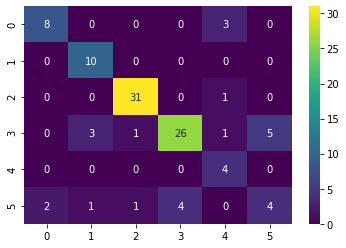

Training set:  1.0
Test set:  0.7904761904761904
              precision    recall  f1-score   support

           P       0.80      0.73      0.76        11
           R       0.71      1.00      0.83        10
          SO       0.94      0.97      0.95        32
          SW       0.87      0.72      0.79        36
           T       0.44      1.00      0.62         4
           W       0.44      0.33      0.38        12

    accuracy                           0.79       105
   macro avg       0.70      0.79      0.72       105
weighted avg       0.80      0.79      0.79       105

{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance'}


In [14]:
ml_model = KNeighborsClassifier()
apply_ml_model(ml_model,parameters_knn, X_train, y_train)

## RFC

confusion_matrix


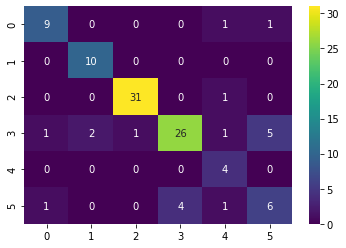

Training set:  1.0
Test set:  0.819047619047619
              precision    recall  f1-score   support

           P       0.82      0.82      0.82        11
           R       0.83      1.00      0.91        10
          SO       0.97      0.97      0.97        32
          SW       0.87      0.72      0.79        36
           T       0.50      1.00      0.67         4
           W       0.50      0.50      0.50        12

    accuracy                           0.82       105
   macro avg       0.75      0.83      0.78       105
weighted avg       0.83      0.82      0.82       105

{'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': 20, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'model__random_state': 42}


In [15]:
ml_model = RandomForestClassifier()
apply_ml_model(ml_model,parameters_rfc, X_train, y_train)

## AdaBoost

confusion_matrix


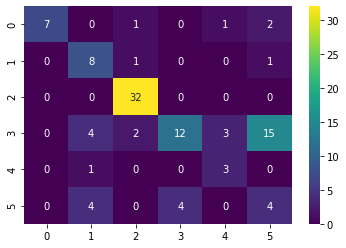

Training set:  0.8126984126984127
Test set:  0.6285714285714286
              precision    recall  f1-score   support

           P       1.00      0.64      0.78        11
           R       0.47      0.80      0.59        10
          SO       0.89      1.00      0.94        32
          SW       0.75      0.33      0.46        36
           T       0.43      0.75      0.55         4
           W       0.18      0.33      0.24        12

    accuracy                           0.63       105
   macro avg       0.62      0.64      0.59       105
weighted avg       0.71      0.63      0.63       105

{'model__algorithm': 'SAMME', 'model__learning_rate': 3, 'model__n_estimators': 300, 'model__random_state': 42}


In [16]:
ml_model = AdaBoostClassifier()
apply_ml_model(ml_model,parameters_ab, X_train, y_train)

## SVC

confusion_matrix


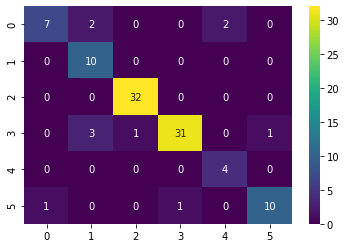

Training set:  0.9682539682539683
Test set:  0.8952380952380953
              precision    recall  f1-score   support

           P       0.88      0.64      0.74        11
           R       0.67      1.00      0.80        10
          SO       0.97      1.00      0.98        32
          SW       0.97      0.86      0.91        36
           T       0.67      1.00      0.80         4
           W       0.91      0.83      0.87        12

    accuracy                           0.90       105
   macro avg       0.84      0.89      0.85       105
weighted avg       0.91      0.90      0.90       105

{'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'linear', 'model__random_state': 42}


In [17]:
ml_model = SVC()
apply_ml_model(ml_model,parameters_svc, X_train, y_train)

## Gradient Boost

confusion_matrix


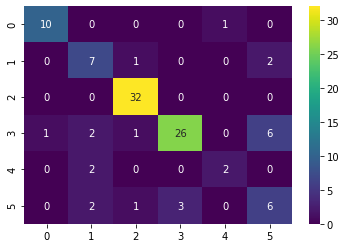

Training set:  1.0
Test set:  0.7904761904761904
              precision    recall  f1-score   support

           P       0.91      0.91      0.91        11
           R       0.54      0.70      0.61        10
          SO       0.91      1.00      0.96        32
          SW       0.90      0.72      0.80        36
           T       0.67      0.50      0.57         4
           W       0.43      0.50      0.46        12

    accuracy                           0.79       105
   macro avg       0.73      0.72      0.72       105
weighted avg       0.81      0.79      0.79       105

{'model__criterion': 'friedman_mse', 'model__learning_rate': 0.1, 'model__loss': 'deviance', 'model__max_features': 'auto', 'model__n_estimators': 100, 'model__random_state': 42}


In [18]:
ml_model = GradientBoostingClassifier()
apply_ml_model(ml_model,parameters_gb, X_train, y_train)

## DecisionTree

confusion_matrix


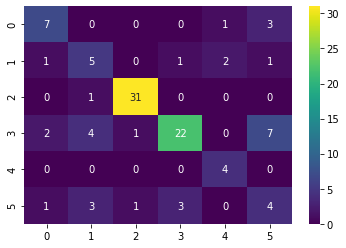

Training set:  0.9714285714285714
Test set:  0.6952380952380952
              precision    recall  f1-score   support

           P       0.64      0.64      0.64        11
           R       0.38      0.50      0.43        10
          SO       0.94      0.97      0.95        32
          SW       0.85      0.61      0.71        36
           T       0.57      1.00      0.73         4
           W       0.27      0.33      0.30        12

    accuracy                           0.70       105
   macro avg       0.61      0.67      0.63       105
weighted avg       0.73      0.70      0.70       105

{'model__criterion': 'gini', 'model__max_depth': 9, 'model__min_samples_leaf': 1, 'model__min_samples_split': 4, 'model__random_state': 42}


In [19]:
ml_model = DecisionTreeClassifier()
apply_ml_model(ml_model,parameters_dt, X_train, y_train)

## Building tree for DecisionTreeClassifier

In [20]:
classifier_dt = DecisionTreeClassifier( 
                                        criterion = 'gini', 
                                        max_depth = 9,
                                        min_samples_leaf=  1,
                                        min_samples_split = 4,
                                        random_state = 42).fit(X_train, y_train.ravel())

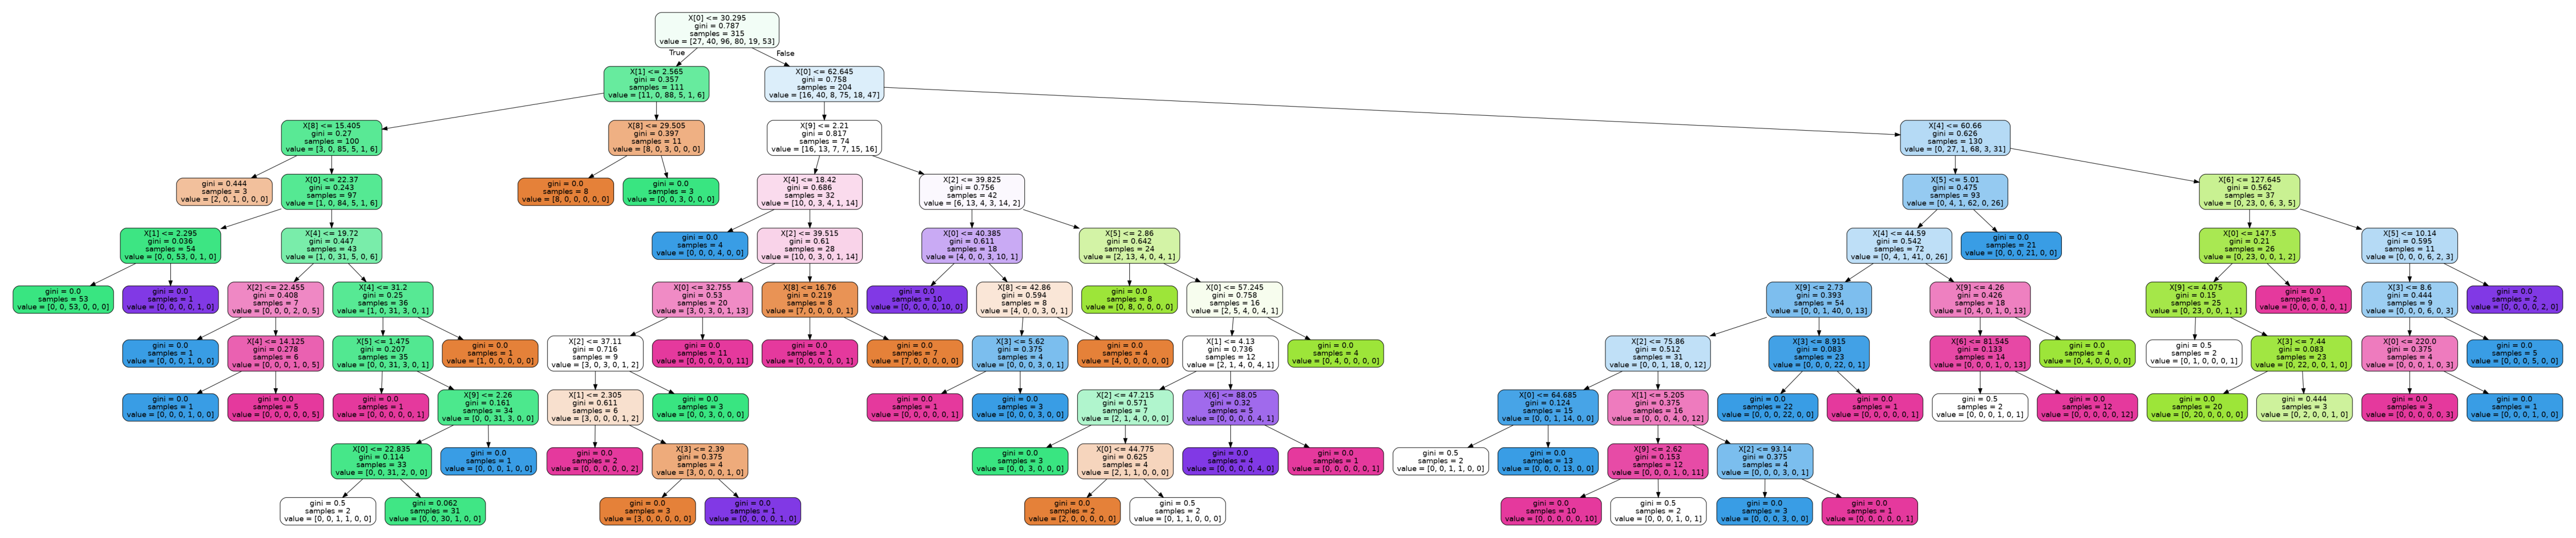

In [21]:
dot_data=export_graphviz(classifier_dt,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')    
plt.figure(num=None, figsize=(30, 30), dpi=200, facecolor='w', edgecolor='k') 
plt.axis("off")
plt.imshow(plt.imread('tree.png'))